In [43]:
# Put these at the top of every notebook to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# General imports
from fastai.imports import *
# Data augmentation (transformations)
from fastai.transforms import * 
# Convolutional learner class
from fastai.conv_learner import *
# Model architecture
from fastai.model import *
# Dataset handling class
from fastai.dataset import *
# SGD with restarts
from fastai.sgdr import *
# Plotting
from fastai.plots import *

# Check GPU hardware is available
print(f'Cuda available: {torch.cuda.is_available()}')
print(f'Cudnn enabled:  {torch.backends.cudnn.enabled}')

PATH = "/home/paperspace/data/dogscats/"

# Uncomment the below if you need to reset your precomputed activations
# shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

sz = 224
arch = resnet34

Cuda available: True
Cudnn enabled:  True


In [44]:
tfms = tfms_from_model(f_model=arch, sz=sz) # this is has no transformation
data = ImageClassifierData.from_paths(path=PATH, tfms=tfms)
# learn = ConvLearner.pretrained(f=arch, data=data, precompute=True)

log_preds = np.load('log_preds.npy', allow_pickle=False)

---

Practice topics:
- np.where
- np.exp
- np.argmax
- np.where
- get a filter/mask of the correctly predicted array
- get the indicies of correctly predicted rows


---

### Assignment

Given these variables:
- `log_preds` : a (2000, 2) array of log probabilities for cats & dogs
- `data.val_y` : an (2000,) array of 1s and 0s

1. Find the row indicies that are correct
1. Find the row indicies that are incorrect
1. Randomly plot 8 of the incorrect images

Recall that `log_preds` is returned by `learn.predict()`. This is the result we have to work with.

---

In [7]:
data.classes

['cats', 'dogs']

In [6]:
# turn log_preds into probabilities
probs = np.exp(log_preds)
probs

array([[ 0.99993,  0.00007],
       [ 0.99601,  0.00399],
       [ 0.99904,  0.00096],
       ..., 
       [ 0.00081,  0.99919],
       [ 0.00052,  0.99948],
       [ 0.00072,  0.99928]], dtype=float32)

In [12]:
# turn probs into categorical preds
preds = probs.argmax(axis=1)
print(preds.shape)
preds

(2000,)


array([0, 0, 0, ..., 1, 1, 1])

In [14]:
# match the predictions to ground truth: val_y
ans_correct = preds == data.val_y
print(ans_correct.shape)
ans_correct

(2000,)


array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [15]:
ans_incorrect = preds != data.val_y
print(ans_incorrect.shape)
ans_incorrect

(2000,)


array([False, False, False, ..., False, False, False], dtype=bool)

In [16]:
def grade(predictions, ground_truth, is_correct):
    """Compare predictions to answers."""
    return (predictions == ground_truth) == is_correct

---

In [18]:
# find which rows we got right, and which rows we got wrong
np.where(grade(preds, data.val_y, is_correct=True))

(array([   0,    1,    2, ..., 1997, 1998, 1999]),)

In [24]:
def grade(predictions, ground_truth, is_correct, indicies=True):
    """Compare predictions to answers. Optionally return row indicies."""
    return np.where((predictions == ground_truth) == is_correct)[0] if indicies else (predictions == ground_truth) == is_correct

In [25]:
# rows that we got wrong
grade(preds, data.val_y, is_correct=False)

array([  53,  219,  371,  481,  563,  705,  879,  885, 1059, 1273, 1614, 1633, 1674, 1959, 1966])

In [26]:
# rows that we got right
grade(preds, data.val_y, is_correct=True)

array([   0,    1,    2, ..., 1997, 1998, 1999])

---

In [29]:
# randomly select 8 incorrect rows and plot them
bad_preds = grade(preds, data.val_y, is_correct=False)
print(bad_preds.shape)
bad_preds

(15,)


array([  53,  219,  371,  481,  563,  705,  879,  885, 1059, 1273, 1614, 1633, 1674, 1959, 1966])

In [64]:
def rand_rows(arr, draws=8):
    """Returns 8 randomly drawn row indicies."""
    return np.random.choice(arr, min(len(arr), draws), replace=False)

In [65]:
rand_wrong = rand_rows(bad_preds)
rand_wrong

array([  53,  879, 1633,  219, 1059, 1959,  563,  705])

---

In [88]:
def get_fpath(indicies, data_obj):
    """Returns a list of: (index, probabilities, path_to_file)"""
    return [(i, data_obj.val_ds.path+data_obj.val_ds.fnames[i]) for i in indicies]

In [90]:
get_fpath(rand_wrong, data)

[(53, '/home/paperspace/data/dogscats/valid/cats/cat.10145.jpg'),
 (879, '/home/paperspace/data/dogscats/valid/cats/cat.724.jpg'),
 (1633, '/home/paperspace/data/dogscats/valid/dogs/dog.5231.jpg'),
 (219, '/home/paperspace/data/dogscats/valid/cats/cat.12272.jpg'),
 (1059, '/home/paperspace/data/dogscats/valid/dogs/dog.5336.jpg'),
 (1959, '/home/paperspace/data/dogscats/valid/dogs/dog.7993.jpg'),
 (563, '/home/paperspace/data/dogscats/valid/cats/cat.10712.jpg'),
 (705, '/home/paperspace/data/dogscats/valid/cats/cat.11297.jpg')]

---

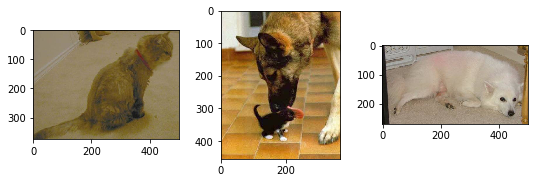

In [71]:
# plot them
plt.figure(figsize=(12, 6))

img = plt.imread(data.val_ds.path + data.val_ds.fnames[53])
plt.subplot(2,4,1)
plt.imshow(img)

img = plt.imread(data.val_ds.path + data.val_ds.fnames[879])
plt.subplot(2,4,2)
plt.imshow(img)

img = plt.imread(data.val_ds.path + data.val_ds.fnames[1633])
plt.subplot(2,4,3)
plt.imshow(img)

In [91]:
def plot8(idx_and_fpath, figsize=(12, 6)):
    """Plot 8 images in a 2rows x 4cols grid"""
    plt.figure(figsize=figsize)
    counter = 0
    for idx, path in idx_and_fpath:
        img = plt.imread(data.val_ds.path + data.val_ds.fnames[idx])
        plt.subplot(2, 4, 1+counter)
        plt.imshow(img)
        counter+=1


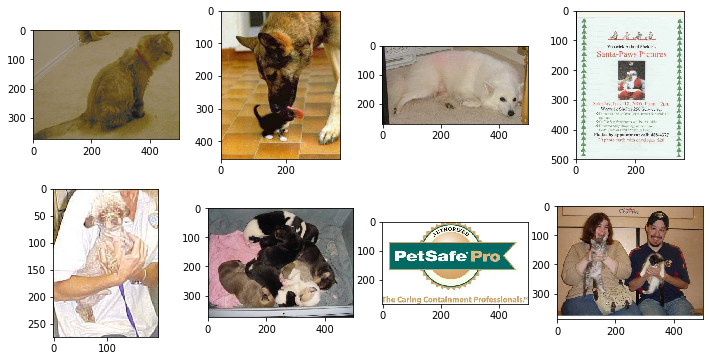

In [92]:
plot8(get_fpath(rand_wrong, data))